<a href="https://colab.research.google.com/github/Nadeem-Anwar/Nadeem-Anwar/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading and Writing** 400X BreaKHis_v1 images

In [1]:
# To mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Folders to store benign and malignant images separately
import os

source = '/content/drive/MyDrive/BreaKHis_v1/histology_slides/breast'
destination = '/content/sample_data'

try:
  os.mkdir(destination + '/BreaKHis_v1')
  os.mkdir(destination + '/BreaKHis_v1/benign')         #all benign images
  os.mkdir(destination + '/BreaKHis_v1/malignant')      #all malignant images
except FileExistsError:
  print('Destination folders already exist')

In [3]:
import cv2
from matplotlib import pyplot

benignImg = []
benignName = []
malignantImg = []
malignantName = []
bCount = 0
mCount = 0
flag = 0

os.chdir(source)
for d in os.listdir():      #to access either of benign or malignant
  if d == 'benign':
    os.chdir(d)
    data = benignImg
    name = benignName
    flag = 0
  elif d == 'malignant':
    os.chdir(d)
    data = malignantImg
    name = malignantName
    flag = 1
  else:
    continue

  for dd in os.listdir():      #to access SOB folder 
    if dd == 'SOB':
      os.chdir(dd)
      os.getcwd()
    else:
      continue

    for typeDir in os.listdir(): #to access various type sample folder
      os.chdir(typeDir)

      for patientDir in os.listdir():#to access each of patient directories
        os.chdir(patientDir)

        for x in os.listdir():        #to access 400X images only
          if x == '400X':
            os.chdir(x)
            print('****** READING  ', os.getcwd() , '******')

            for f in os.listdir():      #to read each image
              file = os.getcwd() + '/' + f
              im = cv2.imread(file)
              data.append(im)
              name.append(f)
              if flag == 0:
                bCount = bCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/benign/' + f, im)
              elif flag == 1:
                mCount = mCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/malignant/' + f, im)

            os.chdir(os.pardir)
            break
          else:
            continue
          os.chdir(os.pardir)
          break   #to be removed later, breaks are used to play with small sample
        os.chdir(os.pardir)
        break   #to be removed later
      os.chdir(os.pardir)
      break   #to be removed later
    os.chdir(os.pardir)
  os.chdir(os.pardir)

print('Images found :\nbenign    = ' + str(bCount), '\nmalignant = ' + str(mCount))

****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/400X ******
Images found :
benign    = 30 
malignant = 20


# **Splitting** BreaKHis dataset and **Writing Splitted** dataset to Google Drive

In [4]:
# To split data into train and test set
from sklearn.model_selection import train_test_split
Bx_train, Bx_test, Bname_train, Bname_test = train_test_split(benignImg, benignName, test_size = 0.2, random_state = 1)
Mx_train, Mx_test, Mname_train, Mname_test = train_test_split(malignantImg, malignantName, test_size = 0.2, random_state = 1)

In [5]:
# Folders for train test splitted data
try:
  os.mkdir(destination + '/BreaKHis_v1/train')
  os.mkdir(destination + '/BreaKHis_v1/train/benign')
  os.mkdir(destination + '/BreaKHis_v1/train/malignant')
  os.mkdir(destination + '/BreaKHis_v1/test')
  os.mkdir(destination + '/BreaKHis_v1/test/benign')
  os.mkdir(destination + '/BreaKHis_v1/test/malignant')
except FileExistsError:
  print('Destination folders already exist')

In [6]:
#To write/save images in given folder path
def imgSave(images, name, path):
  i = 0
  for img in images:
    pyplot.imsave(path + name[i], img, cmap='gray')
    i = i + 1
  return i

Bx_trainCount = imgSave(Bx_train, Bname_train, destination + '/BreaKHis_v1/train/benign/')
Mx_trainCount = imgSave(Mx_train, Mname_train, destination + '/BreaKHis_v1/train/malignant/')
Bx_testCount = imgSave(Bx_test, Bname_test, destination + '/BreaKHis_v1/test/benign/')
Mx_testCount = imgSave(Mx_test, Mname_test, destination + '/BreaKHis_v1/test/malignant/')

print('TRAIN set: benign = ' + str(Bx_trainCount), ', malignant = ' + str(Mx_trainCount))
print('TEST  set: benign = ' + str(Bx_testCount),  ', malignant = ' + str(Mx_testCount))

TRAIN set: benign = 24 , malignant = 16
TEST  set: benign = 6 , malignant = 4


In [7]:
#label set for each of train test set
By_train = [0 for i in range(Bx_trainCount)]
By_test = [0 for i in range(Bx_testCount)]

My_train = [0 for i in range(Mx_trainCount)]
My_test = [0 for i in range(Mx_testCount)]

# **Preprocessing and Feature Extraction**

## *Finalised Section*

In [8]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing             #from sklearn.preprocessing import binarize
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
# version 1

def binarise(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
  return thresh_hold

def hist_equalise(list, count, list_pre):
  x_list_eq = []
  for img in list:
    imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r_image, g_image, b_image = cv2.split(imgc)

    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)

    imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val = None
    list_pre.append(binarise(imgc_eq))

Bx_train_pre = []
Bx_test_pre = []
Mx_train_pre = []
Mx_test_pre = []

hist_equalise(Bx_train, Bx_trainCount, Bx_train_pre)
hist_equalise(Bx_test,  Bx_testCount,  Bx_test_pre)
hist_equalise(Mx_train, Mx_trainCount, Mx_train_pre)
hist_equalise(Mx_test,  Mx_testCount,  Mx_test_pre)

In [9]:
# https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
# TEXTURE FEATURE USING GLCM

from math import fabs
import cv2
import numpy as np
# Find the GLCM
import skimage.feature as feature

def textureFeature(imgList, csvFile):
  open(destination + '/BreaKHis_v1/' + csvFile, 'w').close()
  fAppend = open(destination + '/BreaKHis_v1/' + csvFile, 'a')
  for gray in imgList:
    # Param:   [# source image,   # List of pixel pair distance offsets - here 1 in each direction,   # List of pixel pair angles in radians]
    graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # Find the GLCM properties
    contrast = feature.greycoprops(graycom, 'contrast')
    dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
    homogeneity = feature.greycoprops(graycom, 'homogeneity')
    energy = feature.greycoprops(graycom, 'energy')
    correlation = feature.greycoprops(graycom, 'correlation')
    ASM = feature.greycoprops(graycom, 'ASM')

    fAppend.write(str(contrast[0][0])     +','+ str(contrast[0][1])     +','+ str(contrast[0][2])     +','+ str(contrast[0][3]) +','+ 
                  str(dissimilarity[0][0])+','+ str(dissimilarity[0][1])+','+ str(dissimilarity[0][2])+','+ str(dissimilarity[0][3]) +','+ 
                  str(homogeneity[0][0])  +','+ str(homogeneity[0][1])  +','+ str(homogeneity[0][2])  +','+ str(homogeneity[0][3]) +','+ 
                  str(energy[0][0])       +','+ str(energy[0][1])       +','+ str(energy[0][2])       +','+ str(energy[0][3]) +','+ 
                  str(correlation[0][0])  +','+ str(correlation[0][1])  +','+ str(correlation[0][2])  +','+ str(correlation[0][3]) +','+ 
                  str(ASM[0][0])          +','+ str(ASM[0][1])          +','+ str(ASM[0][2])          +','+ str(ASM[0][3]) +'\n'
                  )

  fAppend.close()
# WRITING FEATURE TO CSV FILE
textureFeature(Bx_train_pre,'Bx_train_pre.csv')
textureFeature(Bx_test_pre, 'Bx_test_pre.csv')
textureFeature(Mx_train_pre,'Mx_train_pre.csv')
textureFeature(Mx_test_pre, 'Mx_test_pre.csv')

## *Not yet finalised*

In [ ]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing             #from sklearn.preprocessing import binarize
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
#version x

def binariser(r):
  #cv2_imshow(r)
  r = cv2.cvtColor(r, cv2.COLOR_RGB2GRAY)
  #cv2_imshow(r)
  t = 96
  for i in range(r.shape[0]):
    for j in range(r.shape[1]):
      if r[i][j] <= t:
        r[i][j] = 0
      elif r[i][j] > t:
        r[i][j] = 255
  cv2_imshow(r)
  return r

def binarise(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
  return thresh_hold

def hist_equalise(list, count, list_pre):
  x_list_eq = []
  for img in list:
    #cv2_imshow(img)
    #hist(img)
    imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r_image, g_image, b_image = cv2.split(imgc)

    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)

    imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val = None
    #print(imgc_eq)
    list_pre.append(binarise(imgc_eq))
    break

Bx_train_pre = []
Bx_test_pre = []
Mx_train_pre = []
Mx_test_pre = []

hist_equalise(Bx_train, Bx_trainCount, Bx_train_pre)
hist_equalise(Bx_test,  Bx_testCount,  Bx_test_pre)
hist_equalise(Mx_train, Mx_trainCount, Mx_train_pre)
hist_equalise(Mx_test,  Mx_testCount,  Mx_test_pre)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    7   21
    6   68  103  186  186  333  340  261  410  597  821 1191 1610 1958
 1702 1766 2625 3360 4001 4318 3997 3786 3919 4556 5189 5029 4590 3953
 3869 4039 4055 4163 3768 3832 3617 3579 3791 3648 3661 3605 3481 3377
 3497 3305 3517 3658 3613 3741 3644 3457 3444 3733 3700 3760 3675 3536
 3500 3697 3796 3991 3841 3588 3300 3232 3416 3599 3488 3529 3238 3154
 2920 2864 3015 3040 2959 2856 2527 2380 2369 2500 2458 2548 2296 1942
 2069 2169 2188 2137 1964 1756 1689 1603 1715 1800 1757 1685 1424 1296
 1436 1446 1581 1496 1371 1127 1050 1149 1252 1255 1212 1108  892  954
  976 

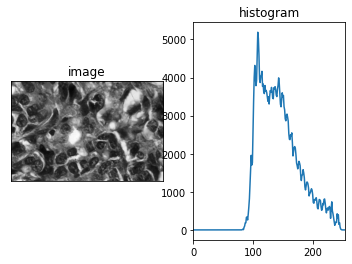

In [10]:
# https://machinelearningprojects.net/histogram-of-a-grayscale-image/
# TO CREATE HISTOGRAM OF AN IMAGE

import numpy as np
def hist(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  # create the histogram
  np.histogram(imgg, bins=10, range=None, normed=None, weights=None, density=None)
  pyplot.subplot(1,2,1)
  pyplot.imshow(imgg,cmap='gray')
  pyplot.title('image')
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.subplot(1,2,2)
  hist, bin = np.histogram(imgg.ravel(),256,[0,255])
  #print(hist, bin)
  pyplot.xlim([0,255])
  pyplot.plot(hist)
  pyplot.title('histogram')
  pyplot.show()

hist(Mx_train[10])

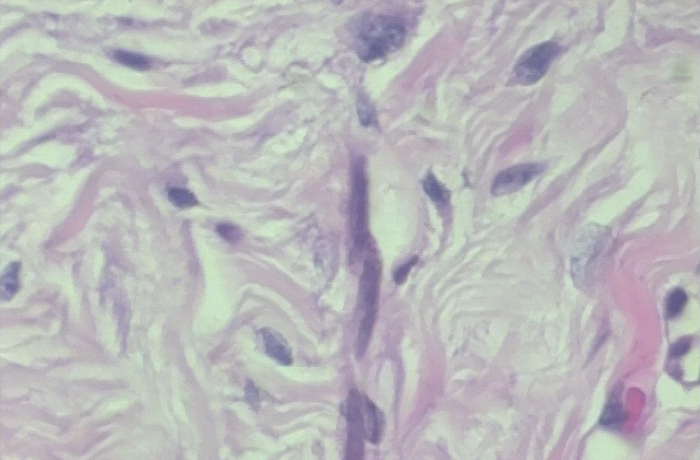

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def binarise(r):
  r = cv2.cvtColor(r, cv2.COLOR_RGB2GRAY)
  print(r.shape)
  a = r[0].min()
  b = r[0].max()
  for i in range(r.shape[0]):
    for j in range(r.shape[1]):
      if r[i][j] == a:
        r[i][j] = 0
      elif r[i][j] == b:
        r[i][j] = 255
  cv2_imshow(r)

# COLOR QUANTIZATION (K=2) using cv2.kmeans()
def color_Quantize(image_spot):
  image_spot_reshaped = image_spot.reshape((image_spot.shape[0] * image_spot.shape[1], 3))

  # convert to np.float32
  Z = np.float32(image_spot_reshaped)
  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((image_spot.shape))
  cv2_imshow(image_spot)
  #cv2_imshow(res2)
  #binarise(res2)

color_Quantize(Bx_train[23])

In [12]:
from scipy.misc import imread, imsave
from google.colab.patches import cv2_imshow
f = '/content/sample_data/BreaKHis_v1/benign/SOB_B_A-14-22549AB-400-001.png'
img = imread(f, mode='L')
t=96
#print(img)
binarized = 1.0*(img>t)
print(binarized)
cv2_imshow(binarized)
imsave(destination + '/BreaKHis_v1/bin.png', binarized)

ImportError: ignored

In [13]:
import numpy as np

im = Mx_train_pre[10]
H, W = im.shape

# Grayscale Pixel Values as Features
features = np.reshape(im, (H * W))
features.shape, features

((322000,), array([58, 54,  0, ...,  0,  0,  0], dtype=uint8))

# Test Code

array([[[145, 129, 158],
        [145, 142, 169],
        [145, 146, 180],
        ...,
        [150,  69, 225],
        [148,  69, 224],
        [147,  68, 214]],

       [[145, 126, 162],
        [145, 139, 172],
        [145, 145, 181],
        ...,
        [151,  72, 228],
        [148,  70, 221],
        [147,  67, 218]],

       [[146, 124, 166],
        [145, 138, 174],
        [145, 141, 186],
        ...,
        [151,  72, 228],
        [148,  71, 219],
        [147,  69, 212]],

       ...,

       [[146, 110, 178],
        [143, 125, 188],
        [143, 132, 197],
        ...,
        [157,  19, 245],
        [152,  15, 237],
        [144,  15, 242]],

       [[145, 115, 175],
        [142, 125, 189],
        [141, 131, 198],
        ...,
        [157,  19, 244],
        [152,  15, 240],
        [146,  15, 245]],

       [[144, 124, 163],
        [141, 133, 177],
        [140, 138, 187],
        ...,
        [157,  19, 243],
        [152,  15, 237],
        [146,  15, 243]]

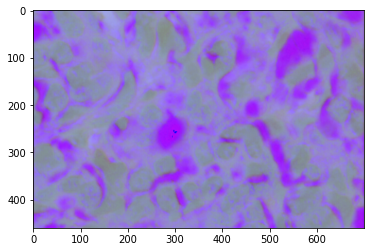

In [14]:
im = Mx_train[10]
im1 = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
#im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2LAB)
#im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)
#im1 = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
pyplot.imshow(im1)
im1

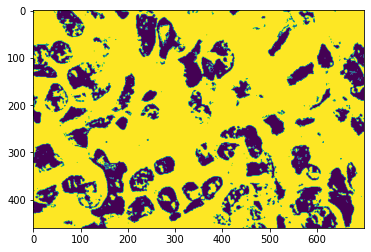

In [15]:
def binarise(img):
  #imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  ret, thresh_hold = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY_INV)
  return thresh_hold

pyplot.imshow(binarise(Mx_train_pre[10]))

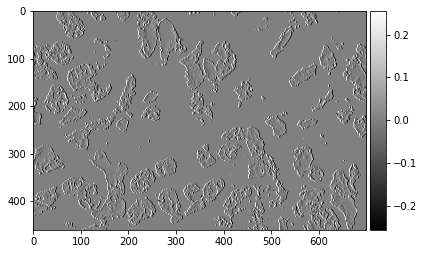

In [16]:
#importing the required libraries
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

#reading the image 
#image = imread('puppy.jpeg',as_gray=True)
image = Mx_train_pre[10]

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

In [17]:
# TEXTURE FEATURE USING GLCM
import cv2
import numpy as np

#image_spot = cv2.imread(image_file)
#gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]

# Find the GLCM
import skimage.feature as feature

# Param:
# source image
# List of pixel pair distance offsets - here 1 in each direction
# List of pixel pair angles in radians
graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

# Find the GLCM properties
contrast = feature.greycoprops(graycom, 'contrast')
dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
homogeneity = feature.greycoprops(graycom, 'homogeneity')
energy = feature.greycoprops(graycom, 'energy')
correlation = feature.greycoprops(graycom, 'correlation')
ASM = feature.greycoprops(graycom, 'ASM')

print("Contrast: {}".format(contrast))
print("Dissimilarity: {}".format(dissimilarity))
print("Homogeneity: {}".format(homogeneity))
print("Energy: {}".format(energy))
print("Correlation: {}".format(correlation))
print("ASM: {}".format(ASM))

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM), axis=0)
features


Contrast: [[154.32583815 195.67699265 160.67779023 192.79370779]]
Dissimilarity: [[3.88473596 4.86461518 4.07825708 4.78147743]]
Homogeneity: [[0.77638199 0.75660537 0.77127179 0.75927347]]
Energy: [[0.73102475 0.72353683 0.72943347 0.72362694]]
Correlation: [[0.74908963 0.68190553 0.73885188 0.68658882]]
ASM: [[0.53439719 0.52350554 0.53207319 0.52363595]]


array([[154.32583815, 195.67699265, 160.67779023, 192.79370779],
       [  3.88473596,   4.86461518,   4.07825708,   4.78147743],
       [  0.77638199,   0.75660537,   0.77127179,   0.75927347],
       [  0.73102475,   0.72353683,   0.72943347,   0.72362694],
       [  0.74908963,   0.68190553,   0.73885188,   0.68658882],
       [  0.53439719,   0.52350554,   0.53207319,   0.52363595]])

Histogram of Local Binary Pattern value: [3.32608696e-02 2.21366460e-02 4.41925466e-03 1.76397516e-03
 1.00000000e-03 5.99378882e-04 4.87577640e-04 3.66459627e-04
 3.69565217e-04 3.29192547e-04 4.37888199e-04 5.31055901e-04
 6.18012422e-04 7.14285714e-04 5.93167702e-04 7.57763975e-04
 7.20496894e-04 8.38509317e-04 7.98136646e-04 9.53416149e-04
 6.86335404e-04 1.08074534e-03 1.06211180e-03 2.25465839e-03
 7.54208075e-01 1.69012422e-01]


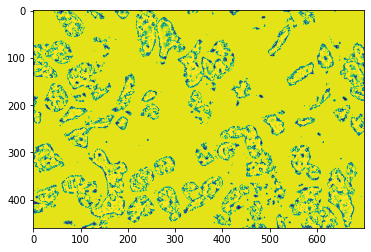

In [18]:
# TEXTURE FEATURE USING LAB
import cv2
from google.colab.patches import cv2_imshow

class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

#image = cv2.imread(image_file)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]
desc = LocalBinaryPatterns(24, 8)
hist, lbp = desc.describe(gray)
print("Histogram of Local Binary Pattern value: {}".format(hist))

contrast = contrast.flatten()
dissimilarity = dissimilarity.flatten()
homogeneity = homogeneity.flatten()
energy = energy.flatten()
correlation = correlation.flatten()
ASM = ASM.flatten()
hist = hist.flatten()

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM, hist), axis=0)
#pyplot.imshow(gray)
pyplot.imshow(lbp)

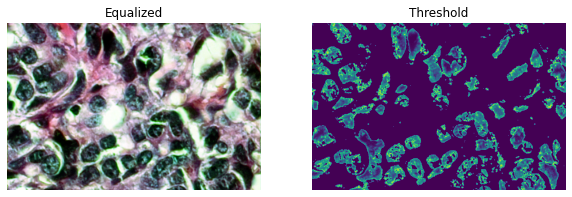

In [ ]:
# https://www.charterglobal.com/what-is-image-binarization-in-ai/
ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
fig = pyplot.figure(figsize=(10, 20))

'''ax1 = fig.add_subplot(2, 3, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 3, 2)
ax2.axis("off")
ax2.title.set_text("BGR2RGB")
'''
ax3 = fig.add_subplot(2, 2, 3)
ax3.axis("off")
ax3.title.set_text("Equalized")

ax4 = fig.add_subplot(2, 2, 4)
ax4.axis("off")
ax4.title.set_text("Threshold")

#ax1.imshow(img, cmap=cmap_val)
#ax2.imshow(imgg, cmap=cmap_val)
ax3.imshow(imgc_eq, cmap=cmap_val)
ax4.imshow(thresh_hold, cmap=cmap_val)
pyplot.imsave(destination + '/BreaKHis_v1/demo.png', thresh_hold)

In [19]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff
images = Mx_train
# Check the distribution of red values 
red_values = []
for i in range(len(images)):
  red_value = np.mean(images[i][:, :, 0])
  red_values.append(red_value)

# Check the distribution of green values 
green_values = []
for i in range(len(images)):
  green_value = np.mean(images[i][:, :, 1])
  green_values.append(green_value)

# Check the distribution of blue values 
blue_values = []
for i in range(len(images)):
  blue_value = np.mean(images[i][:, :, 2])
  blue_values.append(blue_value)
  
# Plotting the histogram
fig = ff.create_distplot([red_values, green_values, blue_values], group_labels=["R", "G", "B"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in RGB')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(Bx_train, By_train)
y_pred = classifier_knn.predict(Bx_test)
print(y_pred)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(By_test, y_pred))